

# Project: Investigate TMDB Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

>This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


> **Research Questions** 
> 1. How have movie ratings changed over time ? 
> 2. How has movie production changed from year to year? Is there correlation between ratings and number of movies ? 
> 3. How has the profitability of the movie industry changed over time? Which year is the most profitable ?  
> 4. How long is the average movie?
> 5. Which genre has the highest number of movies ?
> 6. Does a bigger film production budget result in more profit and popularity?

In [1]:
# importing all python libraries which we'll need for project 

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from datetime import datetime

<a id='wrangling'></a>
## Data Wrangling

Reading & Cleaning of TMDB Movies Dataset  


In [2]:
# Loading tmdb-movies dataset to a dataframe 
df = pd.read_csv('tmdb-movies.csv')

In [3]:
# Printing first 5 rows to inspect
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Displays a summary of the dataset, including the number of non-null values & datatypes for each column.

In [4]:
#summary of the dataframe 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1



### Data Cleaning 

1. Drop columns that we don't need. 
2. Check whether there are duplicates and drop if there is. 
3. Change the type of `release_date` column from *string* to *datetime*
4. Clean null values 

In [5]:
# Delete id,imdb_id,cast,homepage,tagline,keywords,overview columns 

drop_columns = ["id","imdb_id","cast","homepage","tagline","keywords","overview"]
df.drop(drop_columns, axis=1, inplace=True)

In [6]:
# Check whether there is duplicate 
sum(df.duplicated())

1

In [7]:
# Drop duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Check duplicates again
sum(df.duplicated())

0

In [9]:
# Change "release_date" datatype from string to datetime 
df['release_date'] = pd.to_datetime(df['release_date'])


In [10]:
#check the "release_date" datatype 
df.dtypes

popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
dtype: object

In [11]:
# drop null values ( first replace "0" values with NAN)

df = df.replace(0,np.nan) 

df = df.dropna()

In [12]:
# check null values again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3807 entries, 0 to 10848
Data columns (total 14 columns):
popularity              3807 non-null float64
budget                  3807 non-null float64
revenue                 3807 non-null float64
original_title          3807 non-null object
director                3807 non-null object
runtime                 3807 non-null float64
genres                  3807 non-null object
production_companies    3807 non-null object
release_date            3807 non-null datetime64[ns]
vote_count              3807 non-null int64
vote_average            3807 non-null float64
release_year            3807 non-null int64
budget_adj              3807 non-null float64
revenue_adj             3807 non-null float64
dtypes: datetime64[ns](1), float64(7), int64(2), object(4)
memory usage: 446.1+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1

#### How have movie ratings changed over time?

We're going to analyze with two data. Independent feature is the `release_year` column and th dependent feature is the `vote_average` column. We will use *groupby()* for the table by `release_year` and find the *mean()* of the `vote_average` for each year. 

First step is defining a function to find the mean of one column. And then we will groupby the result by another column. This function will be used for the third question again.

In [47]:
# write a function that calculate the average for column_b and groupby by column_a

def grpby_mean(column_a,column_b):
    mean_grpby_df = df.groupby(column_a)[column_b].mean() 
    return mean_grpby_df  

Let's visualize the data we got to come to a conclusion.

Text(0,0.5,'average rating by years')

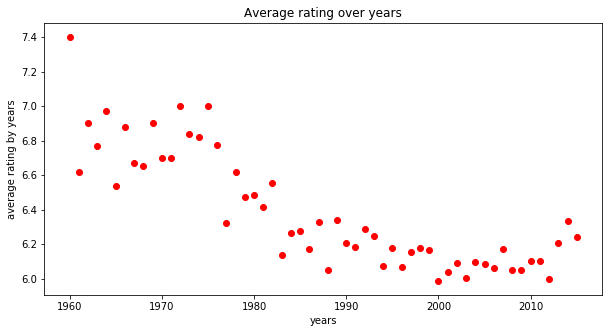

In [48]:
# use gprby_mean function with release_year & vote_average columns. 
avg_rating_year = grpby_mean("release_year","vote_average").sort_index()

# plot relationship release_year vs vote_average 
plt.figure(figsize=(10,5))
plt.scatter(avg_rating_year.index , avg_rating_year , color=["r"])

#plot title
plt.title("Average rating over years")

#x-axis name 
plt.xlabel("years")

#y-axis name 
plt.ylabel("average rating by years")



### Question-1 Conclusion 

* It is clearly seen that the ratings have decreased from year to year. 

* Average ratings have been falling below 7 since the 1980s.

>Since the 1980s, viewers' expectations about movies may have changed or viewers started to give good scores more difficultly. 
And the number of movies produced may also affect this result. We can make this data more meaningful by examining the number of films produced from year to year.


### Research Question 2  

#### How has movie production changed from year to year? Is there correlation between ratings and number of movies ?





Text(0.5,0,'Number of movies by year')

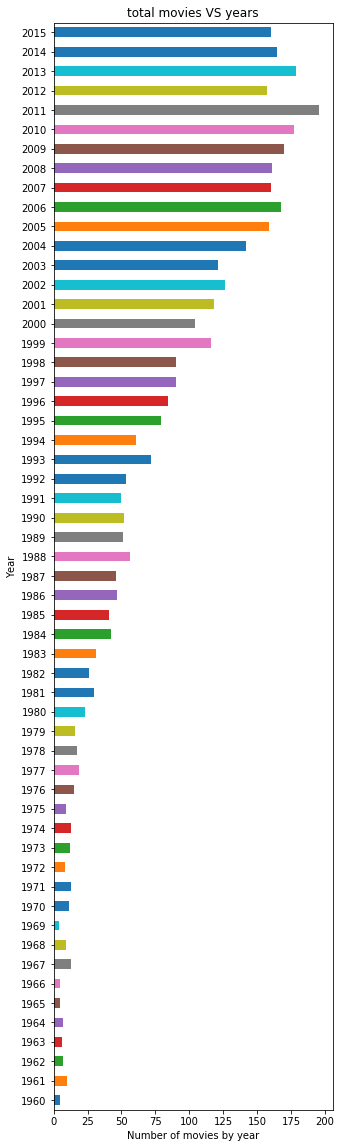

In [54]:
# calculate the number of movies for each year 
movie_total_byyears = df["release_year"].value_counts().sort_index() 

#plot number of movies by years
movie_total_byyears.plot(kind='barh',title="total movies VS years", figsize = (5,20))

# y-axis name 
plt.ylabel("Year")
# x-axis name
plt.xlabel("Number of movies by year")


It is seen that the number of films shot each year has increased significantly over time. 

Text(0,0.5,'Average rating by years')

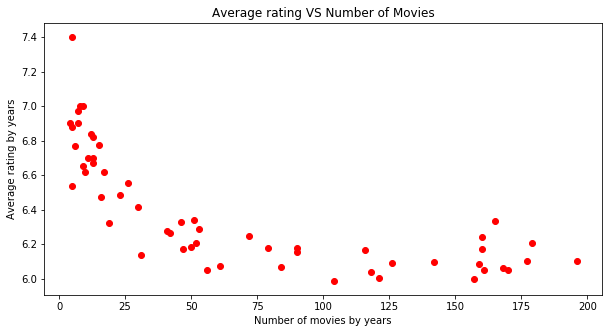

In [50]:
# let's combine two plots that shows us relationship between average rating and number of movies by year

plt.figure(figsize=(10,5))
plt.scatter(movie_total_byyears,avg_rating_year ,color=["r"])

#plot title
plt.title("Average rating VS Number of Movies")

#x-axis name 
plt.xlabel("Number of movies by years")

#y-axis name 
plt.ylabel("Average rating by years")



### Question-2 Conclusion 

  
   * Number of movies increase over years. From the plot *(total movies VS years)*, The number of films per year started to increase rapidly after the 1980s.
   
   * From plot *(Average rating VS Number of Movies)*, there is a negative correlation between the ratings and the number of movies.
   
   
   >This *may not* mean that the quality of the movies has decreased over the years and as the number of movies increases.With the increase in the number of films and the variety, consumers have reached different alternatives and the number of films they can evaluate has increased. Thus, the opportunity to make more comparisons has emerged and the audience's criteria *may be* getting tighter. 
   


   * From the plot *(total movies VS years)* 2011 was the year with the most films. From plot in 2011 over 175 movies has been released. 


So, how has the profit of the film industry changed in an environment where ratings are falling despite the increase in number of movies ? 


### Research Question 3  

#### How has the profitability of the movie industry changed over time?

We're going to analyze with two data. Independent data is the time in `release_year` column and the dependent data is the movie profit in `profit` column that we will create. 

First we calculate the `profit` by subtracting `budget` column from `revenue` column. Then add a new column with the name profit. 


In [17]:
# add a new column that include profit (budget - revenue) 

df["profit"] = df.revenue - df.budget

#check dataframe for new column
df.head()


,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,1.363529e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,2.284364e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,1.852382e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,1.868178e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,1.316249e+09


Use `grpby_mean` function with `release_year` and calculate `mean()` of `profit` for each year. 

Text(0,0.5,'profit')

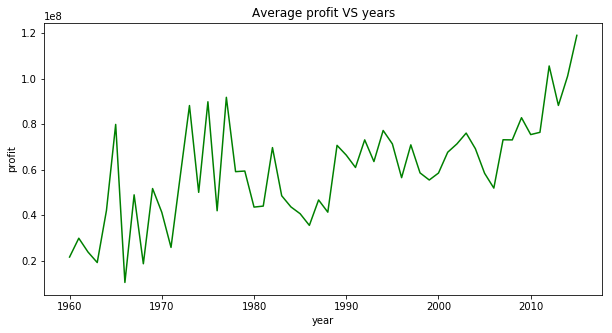

In [46]:
# use grpby_mean function 
avg_profit_year = grpby_mean("release_year","profit")

# plot relationship between release and profit 
avg_profit_year.plot(kind="line",color="g",title="Average profit VS years", figsize=(10,5))

# x-axis name 
plt.xlabel("year")

# y-axis name 
plt.ylabel("profit") 

### Question-3 Conclusion

* Movie profits have increased from year to year. Film industry is a more profit industry despite ratings are falling.

* From plot 2015 is the most profitable year. 

### Research Question 4 

#### How long is the average movie? 


We can find the average runtime of movies by calculate the mean.

In [56]:
# describe method for statistical info
df["runtime"].describe()

count    3807.000000
mean      109.350932
std        19.845761
min        15.000000
25%        96.000000
50%       106.000000
75%       119.000000
max       338.000000
Name: runtime, dtype: float64

Let's visualize the results

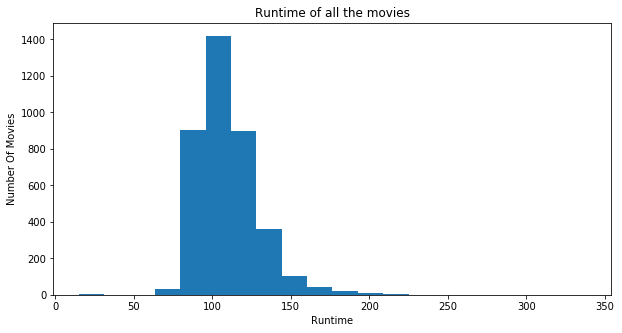

In [60]:
# histrogram for runtime and the number of movies

# figure size
plt.figure(figsize=(10,5))

# x-axis name
plt.xlabel('Runtime')
# y-axis name 
plt.ylabel('Number Of Movies')
# histogram name
plt.title('Runtime of all the movies')

# plot relationship between runtime and number of movies
plt.hist(df['runtime'], bins=20);

From the histogram the distribution is right skewed, and it seems there are outliers in the data.

### Question-4 Conclusion

The average runtime is **109 min**

* 25% of movies have runtime less than **96 min**
* 50% of movies have runtime less than **106 min**
* 75% of movies have runtime less than **119 min**
* max runtime is **338 min** and min runtime is **15 min**

### Research Question 5

#### Which genre has the highest number of movies ?

Define a function to separate genres then calculate the number of movies in each genre.

In [61]:
# Define a function to separate the data in genres column and count the number of movies in each genre 
def separate_count(column):
    split_data = pd.Series(df[column].str.cat(sep = '|').split('|'))
    
    count_data = split_data.value_counts(ascending=False)
    return count_data

Let's visualize the results to make conclusion

Text(0,0.5,'')

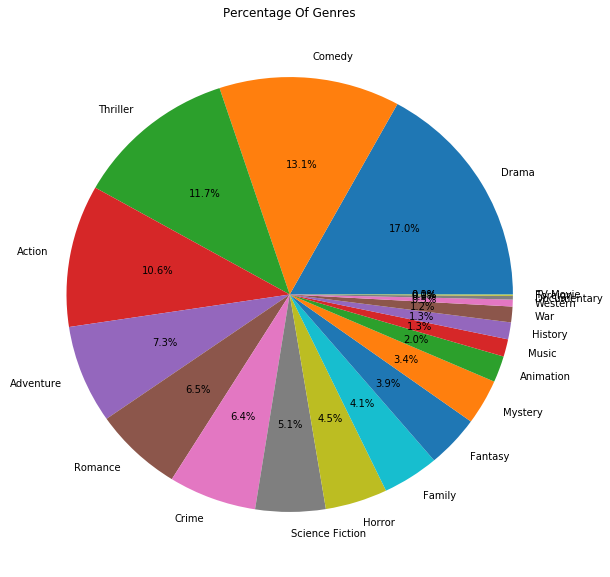

In [69]:
# relationship between genre and number of movies

separate_count("genres").plot(kind="pie",figsize=(10,10),autopct="%1.1f%%")

# the title of the plot

plt.title('Percentage Of Genres')
plt.ylabel('')



### Question-5 Conclusion

* The genre who has the highest number of movies is Drama by 17%.
* The second genre is comedy by 13.1%


### Research Question 6

#### Does a bigger film production budget result in more profit and popularity?

Visualize two columns by scatter plot for the budget and popularity to make conclusion.

Text(0.5,1,'Budget VS Popularity')

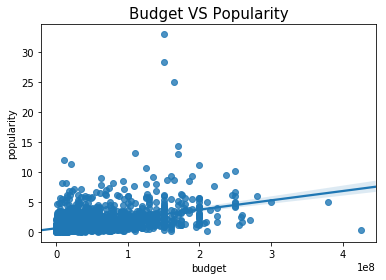

In [74]:
# Plot scatter plot for two columns
sns.regplot(x=df["budget"],y=df["popularity"]).set_title("Budget VS Popularity",size=15)

visualize two columns by scatter plot for the budget and profit to make conclusion.

Text(0.5,1,'Budget VS Profit')

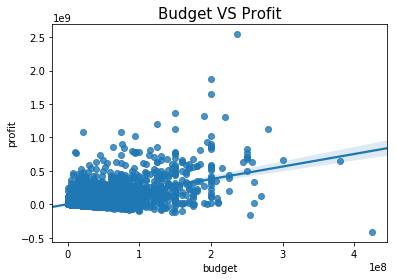

In [75]:
# Plot scatter plot for two columns
sns.regplot(x=df["budget"],y=df["profit"]).set_title("Budget VS Profit",size=15)

### Question-6 Conclusion

Two regplot are both positive correlation. 

* more budget result in more popularity
* more budget result in more profit  

> Does a bigger film production budget result in more profit and popularity? **Answer is YES** 

<a id='conclusions'></a>
##  Final Conclusions

* From rating the movies are getting worse over time.
* The film industry is a profit industry over time.
* The number of movies are increasing over years.
* The average runtime is 109 min.
* The most frequent genre is Drama.
* The more budget the movie have, More popular and profit will get. 

## Limitations 

* Missing values in the data effect the results.
* Budget and revenue have alot of zeros values and had to delete alot of rows.
* Outliers in runtime, and decide what the best way to deal whith them.
* Budget and revenue do not have currency unit.
* Duplicates in the data and will effect the results.
* inccorect datatype.





In [77]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0